In [1]:
import matplotlib.pyplot as plt

In [1]:
%load_ext autoreload
%autoreload 2
from generateLayout import *

In [2]:
num_columns = 4
grid_size = 30
min_room_size = 3
roomspace = grid_size - (num_columns + 1)
num_rooms = 9

In [4]:
divisions = get_divisions(roomspace, num_columns,min_room_size)
walkable_points, chosen_rooms = get_choosen_rooms(divisions,min_room_size,num_rooms)

distances = {}
for i,r1 in enumerate(chosen_rooms):
    for j,r2 in enumerate(chosen_rooms):
        if i<j:
            distances[(i,j)]=get_distance(r1,r2)
            
sorted_pairs=list(sorted(map(lambda x:(x[0],x[1]),distances.items()),key=lambda x:x[1]))
G = get_grid_graph(grid_size,walkable_points,chosen_rooms)
paths = get_paths(G,sorted_pairs,chosen_rooms,grid_size)
paths_lst = [(k, v) for k, v in paths.items()]
rooms_points  = get_room_points(chosen_rooms)
room_G = get_rooms_graph(chosen_rooms,paths_lst,rooms_points)

groups_to_connect = [(0,1),(1,2)]
available_indices = set(range(num_rooms))
splits_it = iterate_G(available_indices,[3,3,3],0,room_G)
found = False
for i,split in enumerate(splits_it):
    skels_it = get_possible_split(split)
    for skels in skels_it:
        if len(skels)==3:
            crossing_edges = get_crossing_edges_list(skels,room_G,groups_to_connect,paths_lst)
            found = True
            print(i,'::::',skels)
            break
    #if i>100:
    if found==True:
        break

string = get_layout_str(walkable_points,skels,crossing_edges,paths_lst,grid_size)
print(string)

2 :::: [{'edges': {0, 1}, 'intersections': {26, 22}}, {'edges': {5, 7}, 'intersections': {32, 35, 17, 23, 25, 31}}, {'edges': {24, 28}, 'intersections': {33, 26, 14}}]
##############################
#      #       #       #     #
#      #       #       #     #
#      #       #             #
#      #       #       ##### #
#      #       #       #     #
#      #       ##### ###     #
#      #       ##### ###     #
#      #       ##### ###     #
#      #       ##### ###     #
# # ####       ##### ###     #
# #  ####### ####### ###     #
# ##  ##       ##### ###     #
# ### ##             ##### ###
# ### ##       ########### ###
# ### ##       #       ### ###
# ### ######## #       ### ###
# ###    ##### #       ### ###
# ###### ##### #       ### ###
# ###### #####         ##  ###
# ###### #######       #  ####
# ###### ##############  #####
# ######       ######   ######
# ######       #####  ########
#      #       #     #########
#      #       # #############
#      #         #########

In [20]:
sorted_pairs=list(sorted(map(lambda x:(x[0],x[1]),distances.items()),key=lambda x:x[1]))

In [21]:
G = get_grid_graph(grid_size,walkable_points,chosen_rooms)

In [22]:
paths = get_paths(G,sorted_pairs,chosen_rooms,grid_size)


In [23]:
paths_lst = [(k, v) for k, v in paths.items()]
rooms_points  = get_room_points(chosen_rooms)

room_G = get_rooms_graph(chosen_rooms,paths_lst,rooms_points)


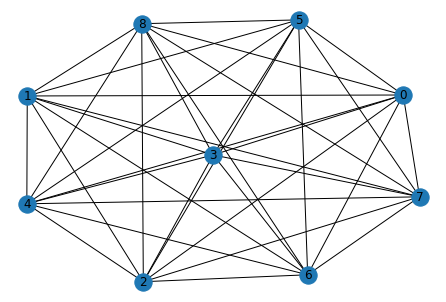

In [24]:
nx.draw(room_G, with_labels=True)
edgs=room_G.edges(data=True)

In [25]:
for e in edgs:
    print(e)

(0, 2, {'corridor_key': 0, 'crossed_corridors': [15, 24, 33], 'crossed_rooms': []})
(0, 3, {'corridor_key': 1, 'crossed_corridors': [31], 'crossed_rooms': []})
(0, 7, {'corridor_key': 9, 'crossed_corridors': [23], 'crossed_rooms': []})
(0, 6, {'corridor_key': 10, 'crossed_corridors': [11, 14, 19, 26, 28], 'crossed_rooms': []})
(0, 8, {'corridor_key': 13, 'crossed_corridors': [24, 26, 33], 'crossed_rooms': []})
(0, 5, {'corridor_key': 15, 'crossed_corridors': [0, 3, 4, 5, 11, 16, 17, 20, 21, 24, 27, 29, 30, 33], 'crossed_rooms': [2]})
(0, 1, {'corridor_key': 18, 'crossed_corridors': [22, 25, 28, 31, 34], 'crossed_rooms': []})
(0, 4, {'corridor_key': 22, 'crossed_corridors': [2, 18, 25, 28, 31, 32, 34], 'crossed_rooms': [1]})
(1, 4, {'corridor_key': 2, 'crossed_corridors': [22, 34], 'crossed_rooms': []})
(1, 7, {'corridor_key': 8, 'crossed_corridors': [25], 'crossed_rooms': []})
(1, 2, {'corridor_key': 16, 'crossed_corridors': [12, 27], 'crossed_rooms': []})
(1, 5, {'corridor_key': 27, '

In [28]:

    

groups_to_connect = [(0,1),(1,2)]
available_indices = set(range(num_rooms))
splits_it = iterate_G(available_indices,[3,3,3],0,room_G)
found = False
for i,split in enumerate(splits_it):
    skels_it = get_possible_split(split)
    for skels in skels_it:
        if len(skels)==3:
            crossing_edges = get_crossing_edges_list(skels,room_G,groups_to_connect)
            found = True
            print(i,'::::',skels)
            break
    #if i>100:
    if found==True:
        break

5 :::: [{'edges': {18, 22}, 'intersections': {32, 34, 2, 18, 22, 25, 28, 31}}, {'edges': {21, 5}, 'intersections': {33, 3, 5, 15, 16, 17, 20, 21, 27, 30}}, {'edges': {6, 14}, 'intersections': {10, 11, 19, 26, 28}}]


In [37]:
%load_ext autoreload
%autoreload 2
from generateLayout import *
string = get_layout_str(walkable_points,skels,[],paths_lst,grid_size)
print(string)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
##############################
#      #######        #      #
#      #######        #      #
#      #######        #      #
#      #######        #      #
##### ########        #      #
#      #######               #
#      #######        ########
#      #######        #      #
#### ###     #        #      #
#### ###     #        #      #
####  ##              ###### #
#####  ####################  #
######      ##        ##### ##
###########  #        ##### ##
############          ##### ##
##############        #      #
##############        #      #
##############        #      #
##############        #      #
##############        #      #
#######################      #
#######################      #
#######################      #
#######################      #
#######################      #
##############        #      #
##############        #      #
##############               #
#############

In [31]:
ix = 2
def get_layout_str(walkable_points,skels,crossing_edges):
    edges = []
    for s in skels:
        edges += list(s['edges'])
    edges += crossing_edges
    walkable_points_all = list(walkable_points)
    for ix in edges:
        walkable_points_all += list(map(toL,paths_lst[ix][1]))
    walkable_points_all = set(walkable_points_all)
    string = create_string(walkable_points1,grid_size)
    return string

In [100]:
get_points_from_group(2, skels, vertices_edges_dict_inv,room_G,paths_lst)

{(14, 6),
 (14, 7),
 (14, 8),
 (14, 9),
 (15, 6),
 (15, 7),
 (15, 8),
 (15, 9),
 (16, 6),
 (16, 7),
 (16, 8),
 (16, 9),
 (17, 6),
 (17, 7),
 (17, 8),
 (17, 9),
 (18, 6),
 (18, 7),
 (18, 8),
 (18, 9),
 (19, 9),
 (20, 6),
 (20, 7),
 (20, 8),
 (20, 9),
 (21, 6),
 (21, 7),
 (21, 8),
 (21, 9),
 (21, 11),
 (21, 12),
 (21, 13),
 (21, 14),
 (22, 6),
 (22, 7),
 (22, 8),
 (22, 9),
 (22, 11),
 (22, 12),
 (22, 13),
 (22, 14),
 (23, 6),
 (23, 7),
 (23, 8),
 (23, 9),
 (23, 11),
 (23, 12),
 (23, 13),
 (23, 14),
 (24, 6),
 (24, 7),
 (24, 8),
 (24, 9),
 (24, 11),
 (24, 12),
 (24, 13),
 (24, 14),
 (25, 6),
 (25, 7),
 (25, 8),
 (25, 9),
 (25, 10),
 (25, 11),
 (25, 12),
 (25, 13),
 (25, 14),
 (26, 6),
 (26, 7),
 (26, 8),
 (26, 9),
 (26, 11),
 (26, 12),
 (26, 13),
 (26, 14),
 (27, 6),
 (27, 7),
 (27, 8),
 (27, 9),
 (27, 11),
 (27, 12),
 (27, 13),
 (27, 14)}

In [103]:

get_points_from_room(1,room_G)

[(0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26),
 (2, 27),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (3, 21),
 (3, 22),
 (3, 23),
 (3, 24),
 (3, 25),
 (3, 26),
 (3, 27),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (4, 20),
 (4, 21),
 (4, 22),
 (4, 23),
 (4, 24),
 (4, 25),
 (4, 26),
 (4, 27)]

In [692]:
# skels is a list of skeletons for each group such as the one in the cell above
# [{'edges': {0, 12}, 'intersections': {15, 21, 24, 25, 28, 29}},
# {'edges': {5, 34}, 'intersections': {31, 35}},
# {'edges': {9, 10}, 'intersections': {14}}]
# groups is a tuple of indices (i,j) of the groups which should be connected..it uses the skels list indices
# [0,1]
# setA = get all vertices from group i (use get_vertices_from_edge_ids)
# setB = get all vertices from group j (use get_vertices_from_edge_ids)
# create all possible pairs (crossing edges) where the first element is from setA and the second from setB
# iterate over the crossing edges (refered here as e): (itertools)
# now when we speak about corridors we mean corridors which are present in the skeletons in the skel list
# these corridors are stored in the 'edges' key of a given skeleton
# if the crossing_edge e intersects some room or corridor from some other group than i or j then skip this edge (other groups are present in skels list)
# intA = get intersection between the crossing edge e and anything (either room or chosen corridor) in group i
# intB = same thing but for group j
# if both intA and intB are not empty then skip this crossing edge
# else return this edge

In [110]:

print(crossing_edges)

[(0, 8), (0, 2), (0, 6), (1, 8), (1, 2), (1, 6), (5, 8), (5, 6), (2, 5)]


In [120]:

crossing_edges = get_crossing_edges(skels, groups_to_connect,vertices_edges_dict_inv,vertices_edges_dict)
get_edges_from_skels(crossing_edges, groups_to_connect, skels,vertices_edges_dict_inv,room_G,paths_lst,vertices_edges_dict)

2

In [696]:
paths_lst[4]

((2, 3),
 [(13, 9), (13, 8), (13, 7), (13, 6), (13, 5), (13, 4), (13, 3), (12, 3)])